In [1]:
## Import packages
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['xtick.major.pad'] = 1
rcParams['ytick.major.pad'] = 1

# First we read the data

In [2]:
Data = pd.read_csv('train.csv')
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Cleaning the data is the most important part in our analysis, we couldn't deal with string so we convert the strings to numerical to be able to deal with it.

so firstly we convert femle and male in the column of sex to 0 and 1 , then we convert (S , C and Q) in Embarked column to unique intergers 
and we can drop some cloumns which hard to deal with it and it isn't have a big change in our accuracy

## 1.Drop unecessary columns

In [3]:

Data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)
Data.head(891)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


## 2.Numerize Embarked "0" for  'c' ; "1"  for 's' , "2"  for 'Q' , benign using a dictionary and map function


In [4]:
Embark_coder = {'S':0, 'C':1 , 'Q':2}
Data.Embarked = Data.Embarked.map(Embark_coder)
Data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.9250,0.0
3,1,1,female,35.0,1,0,53.1000,0.0
4,0,3,male,35.0,0,0,8.0500,0.0
5,0,3,male,NaN,0,0,8.4583,2.0
6,0,1,male,54.0,0,0,51.8625,0.0
7,0,3,male,2.0,3,1,21.0750,0.0
8,1,3,female,27.0,0,2,11.1333,0.0
9,1,2,female,14.0,1,0,30.0708,1.0


In [5]:
sex_coder = {'female':1, 'male':0}
Data.Sex = Data.Sex.map(sex_coder)
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
5,0,3,0,NaN,0,0,8.4583,2.0
6,0,1,0,54.0,0,0,51.8625,0.0
7,0,3,0,2.0,3,1,21.0750,0.0
8,1,3,1,27.0,0,2,11.1333,0.0
9,1,2,1,14.0,1,0,30.0708,1.0


### in our data it most probably to have a missing data so we must deal with it and take care that our action is helping us to have high accuracy, So we wil replace all NaN's in Age cloumn with the mean of the all ages we have.

In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0)
Data[['Age']] = imputer.fit_transform(Data[['Age']])
Data[['Fare']] = imputer.fit_transform(Data[['Fare']])
Data

C:\Users\Speed\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
5,0,3,0,29.699118,0,0,8.4583,2.0
6,0,1,0,54.000000,0,0,51.8625,0.0
7,0,3,0,2.000000,3,1,21.0750,0.0
8,1,3,1,27.000000,0,2,11.1333,0.0
9,1,2,1,14.000000,1,0,30.0708,1.0


In [7]:
features = Data.iloc[:,2:-1].values
goal = Data.iloc[:,-1].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)
# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split( features, goal, train_size=0.8, random_state=0)


C:\Users\Speed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_train, goal_test)#Pass the right arguments
pd.DataFrame(cm)

ValueError: Found input variables with inconsistent numbers of samples: [712, 179]

In [9]:
Data.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,2.531876,0.147541,30.415100,0.553734,0.329690,22.117887,0.307832
1,1.950292,0.681287,28.549778,0.473684,0.464912,48.395408,0.450000


In [10]:
surviving = Data.Survived

In [11]:
Data.drop('Survived', axis = 1, inplace = True)

In [12]:
# Then append surviving to end of dataframe
Data['Survived'] = surviving
Data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1
2,3,1,26.0,0,0,7.9250,0.0,1
3,1,1,35.0,1,0,53.1000,0.0,1
4,3,0,35.0,0,0,8.0500,0.0,0


In [13]:
# Quick glimpse of surviving features (mean values) in relation to Survived
Data.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,
0,2.531876,0.147541,30.415100,0.553734,0.329690,22.117887,0.307832
1,1.950292,0.681287,28.549778,0.473684,0.464912,48.395408,0.450000


## For visual comparisons of differential status...
## create to dataframes - one for dead people , one for Survived peolpe in our data

In [14]:


Data_n = Data[Data['Survived'] == 0]
Data_y = Data[Data['Survived'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(Data.columns[0:10])
print(Data_n)
print(Data_y)
print(features_means)
print(Data.columns[0:10])

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked  Survived
0         3    0  22.000000      1      0    7.2500       0.0         0
4         3    0  35.000000      0      0    8.0500       0.0         0
5         3    0  29.699118      0      0    8.4583       2.0         0
6         1    0  54.000000      0      0   51.8625       0.0         0
7         3    0   2.000000      3      1   21.0750       0.0         0
12        3    0  20.000000      0      0    8.0500       0.0         0
13        3    0  39.000000      1      5   31.2750       0.0         0
14        3    1  14.000000      0      0    7.8542       0.0         0
16        3    0   2.000000      4      1   29.1250       2.0         0
18        3    1  31.000000      1      0   18.0000       0.0         0
20        2    0  35.000000      0      0   26.0000       0.0         0
24        3    1   8.000000      3      1   21.0750       0.0         0
26        3    0  29.699118      0      0    7.2250       1.0   

In [15]:
outcome_count = Data.Survived.value_counts()#calculates how many people survived and how meny died
outcome_count = pd.Series(outcome_count)
outcome_count = pd.DataFrame(outcome_count)
outcome_count.index = ['Survived', 'Died']

outcome_count['Percent'] = 100*outcome_count['Survived']/sum(outcome_count['Survived'])
outcome_count['Percent'] = outcome_count['Percent'].round().astype('int')

print('The Perecentage of people classified as \'survived\' in this data set is: {}'.format(100*float(Data.Survived.value_counts()[1])/float((len(Data)))))
print('\nA good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy')
outcome_count

The Perecentage of people classified as 'survived' in this data set is: 38.38383838383838

A good classifier should therefore outperform blind guessing knowing the proportions i.e. > 62% accuracy


,Survived,Percent
Survived,549,62
Died,342,38


## Visualize frequency of surviving in dataset

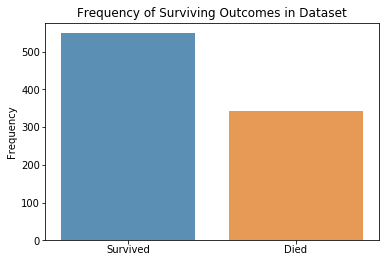

In [16]:

sns.barplot(x = ['Survived', 'Died'], y = 'Survived', data = outcome_count, alpha = .8)
plt.title('Frequency of Surviving Outcomes in Dataset')
plt.ylabel('Frequency')
plt.show()

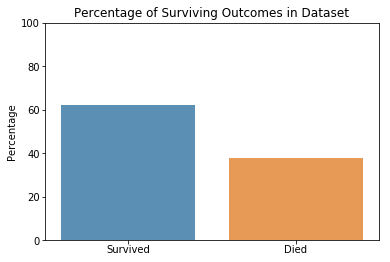

In [17]:
# Visualize frequency of surviving in dataset
sns.barplot(x =['Survived', 'Died'] , y = 'Percent', data = outcome_count, alpha = .8)
plt.title('Percentage of Surviving Outcomes in Dataset')
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

## After cleaning the data, we can move on to the next step to choose a viable algorithm for our data. Before using the algorithms, we must divide the data into a training group and test group to make sure that the algorithms we use have the highest accuracy in the classification

In [18]:
features = Data.iloc[:,2:-1].values
goal = Data.iloc[:,-1].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)


In [19]:
# split into train and test
from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split( features, goal, train_size=0.8, random_state=0)


C:\Users\Speed\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:

from sklearn.model_selection import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split( features, goal, train_size=0.8, random_state=0)

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state=0)


## Random Forest 

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_train, goal_test,)#Pass the right arguments
pd.DataFrame(cm)

ValueError: Found input variables with inconsistent numbers of samples: [712, 179]

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = train_set, goal_train
X1, X2= np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('features')
plt.ylabel('status')
plt.legend()
plt.show()

# Decision Tree

###### here we will here do sum training using fit function

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)


## Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(goal_test , classifier.predict(test_set))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

##  visualization of  our data

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = train_set, goal_train
X1, X2= np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.